<a href="https://drive.google.com/file/d/1n7Pj2IQd9rrED4miEZHCYje22P_yCYIA/view?usp=sharing" target="_blank" >
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

In [75]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import Input
%matplotlib inline


In [76]:
(_,_), (X, y) = keras.datasets.mnist.load_data()
X.shape,y.shape

((10000, 28, 28), (10000,))

In [3]:
type(y)

numpy.ndarray

In [16]:
X_train[]

array([ True, False, False, ..., False, False, False])

In [77]:
# Function to get the MNIST data
def get_data():

  # Load the MNIST data from keras datasets
  (_,_), (X, y) = keras.datasets.mnist.load_data()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=10)
  
  # Get indices of train and test data where label is either 4 or 9
  # Two ways of applying the filters
  # Method 1: 
  # filter4 = y_train==4
  # filter7 = y_train==7
  # filter = filter4 + filter7
  
  # Method 2: 
  # A very silly mistake here that I have made, cauzing my model to predict everything as 0
  # train_filter = np.logical_or(y_train==4,y_train==7)
  # test_filter = np.logical_or(y_test==4,y_test==7)  
  train_filter = np.logical_or(y_train==4,y_train==9)
  test_filter = np.logical_or(y_test==4,y_test==9)  


  # Get only the data consiting of 4s and 9s
  X_train, y_train, X_test, y_test = X_train[train_filter],y_train[train_filter],X_test[test_filter],y_test[test_filter]

  # Reduce the number of train data points by 50%
  X_train = X_train[0:len(X_train)//2]
  y_train = y_train[0:len(y_train)//2]

  # Helper code to replace 9's with label 1 and 4's with label 0 for train data
  get_nine = np.where((y_train == 9))
  y_train = np.zeros(y_train.shape)
  y_train[get_nine] = 1

  # Helper code to replace 9's with label 1 and 4's with label 0 for test data
  get_nine = np.where((y_test == 9))
  y_test = np.zeros(y_test.shape)
  y_test[get_nine] = 1

  return X_train, X_test, y_train, y_test
  

In [78]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train,y_test = get_data()


In [82]:
# Split the train data into train and validation set 
# with 70% train data and random state as 40
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.7,random_state=40)
# Take a quick look at the shape of the train, validation and test data
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape


((51, 28, 28), (51,), (1776, 28, 28), (1776,), (23, 28, 28), (23,))

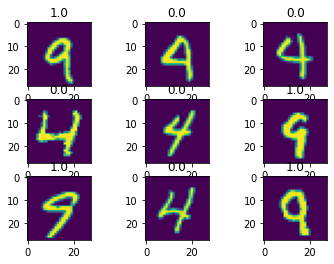

In [37]:
# Plot any 9 images from the train data along with their labels
# ** Your code here **
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i].reshape(28,28))
  plt.title(f'{y_train[i]}')


In [38]:
y_train

array([1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1.])

In [39]:
# Define a simple neural network with 3 dense layers each 
# with 200 nodes and 'relu' activation
# ** Your code here **
input_layer = Input(shape=(28,28))
flatten_layer = Flatten()(input_layer)
dense1 = Dense(200,activation='relu')(flatten_layer)
dense2 = Dense(200,activation='relu')(dense1)
dense3 = Dense(200,activation='relu')(dense2)
output_layer = Dense(1,activation='sigmoid')(dense3)
# model.add(Flatten())
# model.add(Dense(200,activation='relu'))
# model.add(Dense(200,activation='relu'))
# model.add(Dense(200,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))
unreg_model = keras.Model(inputs=input_layer,outputs=output_layer)
# Compile the model with binary cross entropy and Adam 
# Use accuracy as the metric
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
unreg_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

# Fit the model on the train and validation data for 1000 epochs 
# with batch size of 64 
epochs=1000
# callbacks = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)
# history = model.fit(X_train,y_train,batch_size=64,epochs=1000,validation_data=(X_val,y_val))
history = unreg_model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/1000
2/2 [==============================] - 1s 168ms/step - loss: 13.5897 - accuracy: 0.6081 - val_loss: 10.5177 - val_accuracy: 0.6970
Epoch 2/1000
2/2 [==============================] - 0s 27ms/step - loss: 4.7345 - accuracy: 0.6622 - val_loss: 32.3639 - val_accuracy: 0.3939
Epoch 3/1000
2/2 [==============================] - 0s 31ms/step - loss: 13.1147 - accuracy: 0.5946 - val_loss: 16.2030 - val_accuracy: 0.5152
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 3.5765 - accuracy: 0.8378 - val_loss: 4.8698 - val_accuracy: 0.7576
Epoch 5/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.7382 - accuracy: 0.9324 - val_loss: 7.0640 - val_accuracy: 0.7576
Epoch 6/1000
2/2 [==============================] - 0s 31ms/step - loss: 2.8374 - accuracy: 0.7973 - val_loss: 4.5114 - val_accuracy: 0.7273
Epoch 7/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1470 - accuracy: 0.9459 - val_loss: 3.3842 - val_accuracy: 0.7273
Epoch 8

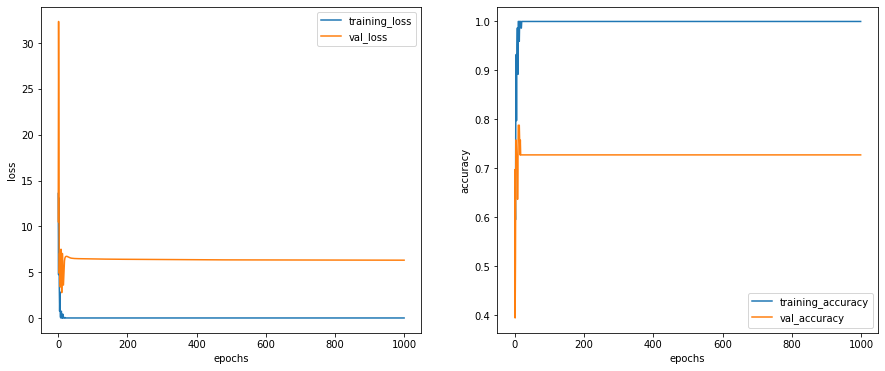

In [50]:
# Get the trace plot of the model training
# ** Your code here **
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax[0].plot(history.history['loss'],label='training_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],label='training_accuracy')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()


In [70]:
# Compute and print the accuracy of the unregularized model
unreg_model.evaluate(X_test,y_test)

56/56 [==============================] - 0s 2ms/step - loss: 4.7799 - accuracy: 0.8271


[4.779885768890381, 0.8271396160125732]

## REGULARIZED NETWORK

Use the same model definition as given before in the unregularized definition.

Perform any type of regularization techniques (you can mix multiple methods as well) to get a better accuracy as compared to the unregularized model.

In [84]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train, y_test = get_data()
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.7,random_state=40)

In [104]:
# Define your regularized model
# The model should be the same as the unregularized with 
# additional regularization techniques
# Dropout, l2
l2 = tf.keras.regularizers.l2(l2=0.01)
input_layer = Input(shape=(28,28))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
regdense1 = Dense(200,activation='relu')(flatten_layer)
dropout1 = tf.keras.layers.Dropout(0.4)(regdense1)
regdense2 = Dense(200,activation='relu')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.4)(regdense2)
dense3 = Dense(200,activation='relu')(dropout2)
output_layer = Dense(1,activation='sigmoid')(dense3)
reg_model = tf.keras.Model(inputs=input_layer,outputs=output_layer)

# Compiling model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
reg_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
# Early Stopping
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=50,restore_best_weights=True)
reg_history = reg_model.fit(X_train, y_train, epochs=1000, batch_size=64, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/1000
2/2 [==============================] - 1s 170ms/step - loss: 31.6085 - accuracy: 0.5541 - val_loss: 57.5696 - val_accuracy: 0.3636
Epoch 2/1000
2/2 [==============================] - 0s 29ms/step - loss: 41.3116 - accuracy: 0.5541 - val_loss: 11.5020 - val_accuracy: 0.5152
Epoch 3/1000
2/2 [==============================] - 0s 30ms/step - loss: 18.1441 - accuracy: 0.6486 - val_loss: 4.3459 - val_accuracy: 0.6970
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 12.9489 - accuracy: 0.6486 - val_loss: 6.3404 - val_accuracy: 0.6667
Epoch 5/1000
2/2 [==============================] - 0s 31ms/step - loss: 14.6857 - accuracy: 0.5946 - val_loss: 3.6619 - val_accuracy: 0.7576
Epoch 6/1000
2/2 [==============================] - 0s 31ms/step - loss: 6.2692 - accuracy: 0.7703 - val_loss: 10.2464 - val_accuracy: 0.6364
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 7.1004 - accuracy: 0.7838 - val_loss: 15.0953 - val_accuracy: 0.5152
Epo

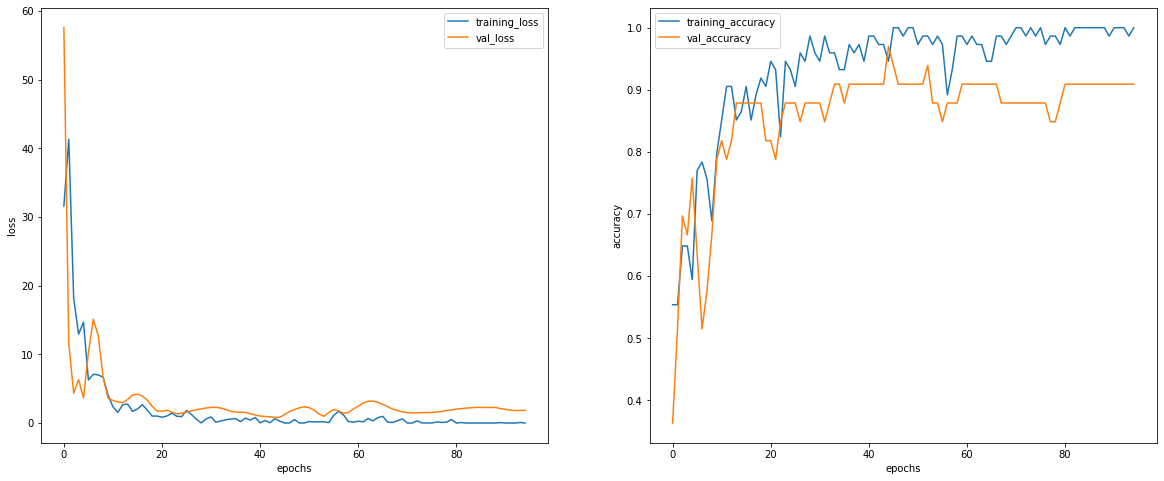

In [105]:
from IPython.core.pylabtools import figsize
# Get the trace plot of the model training
# ** Your code here **
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0].plot(reg_history.history['loss'],label='training_loss')
ax[0].plot(reg_history.history['val_loss'],label='val_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(reg_history.history['accuracy'],label='training_accuracy')
ax[1].plot(reg_history.history['val_accuracy'],label='val_accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [106]:
# Compute and print the accuracy of the regularized model
reg_model.evaluate(X_test,y_test)


56/56 [==============================] - 0s 2ms/step - loss: 1.7051 - accuracy: 0.9037


[1.7051156759262085, 0.9037162065505981]

## REGULARIZATION USING DATA AUGMENTATION

In [107]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train, y_test = get_data()
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.7,random_state=40)

In [108]:
# Reshape the train and test data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Perform data augmentation by calling the ImageDataGenerator function
# with appropriate transformation values
datagen = ImageDataGenerator(rescale=1./255,
                             width_shift_range=.1,
                             height_shift_range=.1,
                             rotation_range=20,
                             zoom_range=0.3,
                             validation_split=0.2)


In [109]:
# Fit the generator on the train data using the train data 
# and 'training' subset
train_generator = datagen.flow(X_train,y_train,batch_size=32,subset='training')

# Fit the generator on the train data using the train data and 
# 'validation' subset
validation_generator = datagen.flow(X_train,y_train,batch_size=32,subset='validation')


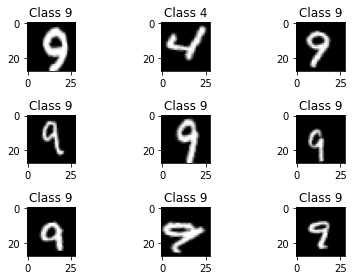

In [110]:
# Helper code to visualize some generated data
im = train_generator.next()

for i in range(9):

  # define subplot
  plt.subplot(330 + 1 + i)
  
  # plot raw pixel data
  plt.imshow(im[0][i].squeeze(), cmap=plt.get_cmap('gray'))
  if im[1][i]==0:
    label = "Class 4"
  else:
    label="Class 9"
  plt.title(label)

# show the figure
plt.tight_layout()
plt.show()


In [116]:
# Define your neural network model with the same definition 
# as in the unregularized model and apply appropriate regularization methods
l2 = tf.keras.regularizers.l2(l2=0.01)
input_layer = Input(shape=(28,28))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
regdense1 = Dense(200,activation='relu')(flatten_layer)
dropout1 = tf.keras.layers.Dropout(0.4)(regdense1)
regdense2 = Dense(200,activation='relu')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.4)(regdense2)
dense3 = Dense(200,activation='relu')(dropout2)
output_layer = Dense(1,activation='sigmoid')(dense3)
aug_model = tf.keras.Model(inputs=input_layer,outputs=output_layer)

# Compiling model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
aug_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
# Early Stopping
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=500,restore_best_weights=True)
aug_history = aug_model.fit(train_generator, epochs=1000, 
                            batch_size=64, callbacks=callbacks, validation_data=validation_generator)


# Fit the generated model on the train and validation data



Epoch 1/1000
2/2 [==============================] - 1s 206ms/step - loss: 0.6783 - accuracy: 0.5833 - val_loss: 0.7294 - val_accuracy: 0.3571
Epoch 2/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.6469 - accuracy: 0.5833 - val_loss: 0.7758 - val_accuracy: 0.3571
Epoch 3/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.6629 - accuracy: 0.5667 - val_loss: 0.7797 - val_accuracy: 0.3571
Epoch 4/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.6603 - accuracy: 0.5667 - val_loss: 0.7608 - val_accuracy: 0.3571
Epoch 5/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.6303 - accuracy: 0.6333 - val_loss: 0.6128 - val_accuracy: 0.5000
Epoch 6/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.6433 - accuracy: 0.6667 - val_loss: 0.6275 - val_accuracy: 0.7143
Epoch 7/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.6319 - accuracy: 0.6000 - val_loss: 0.6156 - val_accuracy: 0.6429
Epoch 8/1000

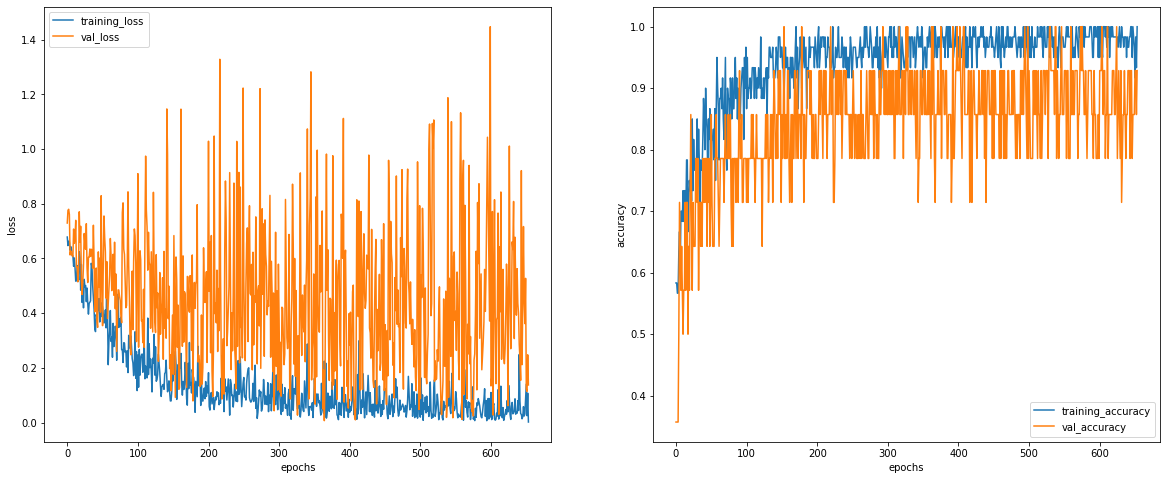

In [117]:
# Visualize the trace-plot
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0].plot(aug_history.history['loss'],label='training_loss')
ax[0].plot(aug_history.history['val_loss'],label='val_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(aug_history.history['accuracy'],label='training_accuracy')
ax[1].plot(aug_history.history['val_accuracy'],label='val_accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [118]:
# Evaluate the accuracy of the model on the test data
aug_model.evaluate(X_test,y_test)


56/56 [==============================] - 0s 2ms/step - loss: 30.7199 - accuracy: 0.9566


[30.71988296508789, 0.9566441178321838]